Collects the median of the bias images

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob as g
from matplotlib import colors as mcolors

# Create bias array
bias_files = sorted(g.glob(r'C:/Users/jakef/OneDrive/Desktop/ASTR_362/Observing/lab_1_bias_images/*.fit'))
bias_corrected = np.zeros([len(bias_files), 3522, 4656])
bias_header = []

for i, bias_file in enumerate(bias_files):
    with fits.open(bias_file) as foo:
        bias_corrected[i, :, :] = foo[0].data / 16 + 1
        bias_header.append(foo[0].header)

# Calculate mean and median of bias
bias_mean = np.mean(bias_corrected, axis=0)
bias_median = np.median(bias_mean)

print('Median of bias images in counts:', np.round(bias_median, 4))

Median of bias images in counts: 153.65


Text(0.5, 1.0, 'Average Bias Image: QHY 163 CMOS')

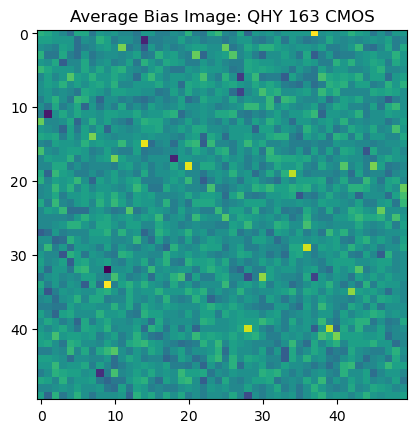

In [59]:
#plot normalized flat image for 50x50 pixel range
plt.imshow(bias_corrected[0][0:50,0:50])
plt.title('Average Bias Image: QHY 163 CMOS')

Collects the median of the dark images

In [25]:
import numpy as np
from astropy.io import fits
import glob as g

# Load dark images
dark_files = sorted(g.glob(r'C:/Users/jakef/OneDrive/Desktop/ASTR_362/Observing/dark_images/*.fit'))
dark_array = np.zeros([len(dark_files), 3522, 4656])
dark_header = []

# Loop through the files, store their values in the array 'dark_array'
for i, dark_file in enumerate(dark_files):
    with fits.open(dark_file) as dark_foo:
        dark_array[i, :, :] = dark_foo[0].data / 16 + 1
        dark_header.append(dark_foo[0].header)

# Calculate the mean and median of the 'dark_array'
dark_mean = np.mean(dark_array, axis=0)
dark_median = np.median(dark_mean)

print('Median of dark images in counts:', np.round(dark_median, 4))

Median of dark images in counts: 154.6


Creates the normalized flats

In [54]:
import numpy as np
from astropy.io import fits
import glob as g

# Load FITS and normalize them
flats = sorted(g.glob(r'C:/Users/jakef/OneDrive/Desktop/ASTR_362/Observing/twilight_images/*.fit'))
flats_array = np.zeros([20, 3522, 4656])
flats_header = []

# Create normalized flats
for i in range(20):
    with fits.open(flats[i]) as flats_foo:
        # Subtract bias and normalize by the median of the bias-corrected image
        bias_corrected_flats = (flats_foo[0].data / 16 + 1) - bias_mean
        flats_array[i, :, :] = bias_corrected_flats / np.median(flats_foo[0].data - bias_median)
        flats_header.append(flats_foo[0].header)

# Example normalized flats (first one)
normalized_flats = flats_array[0]

Plot the normalized flats image

Text(0.5, 1.0, 'Normalized Twilight Flat Image: QHY 163 CMOS')

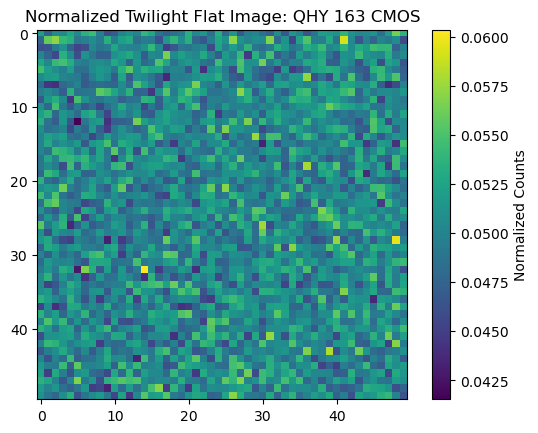

In [27]:
#plot normalized flat image for 50x50 pixel range
plt.imshow(flat_array[0][0:50,0:50])
plt.colorbar(label='Normalized Counts')
plt.title('Normalized Twilight Flat Image: QHY 163 CMOS')

Plots the difference histogram

Average Read Noise -0.0347362337496511


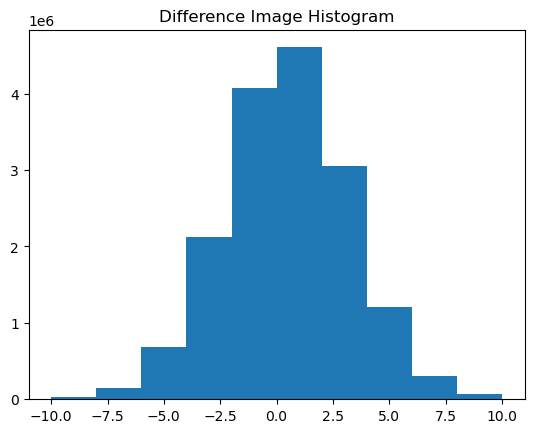

In [28]:
#plot histogram of difference image and find average read noise
diff_image = (bias_corrected[1] - bias_corrected[0])
diff_image_flatten = diff_image.flatten()
read_noise = (bias_corrected[1] - bias_corrected[0]) / np.sqrt(2)
average_read_noise = np.mean(read_noise)

print('Average Read Noise', average_read_noise)

# Creates the plot
plt.hist(diff_image_flatten, range=(-10,10))
plt.title('Difference Image Histogram')
plt.show()

Plots the Alberio science image 

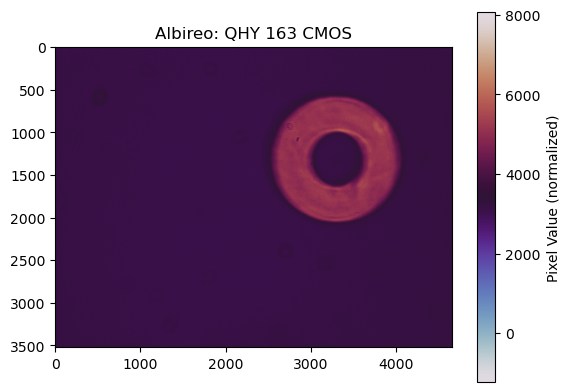

In [50]:
albi = r'C:/Users/jakef/OneDrive/Desktop/ASTR_362/Observing/science_images/alberio_2.fit'

# Open the FITS file
with fits.open(albi) as albi_foo:
    albi_data = albi_foo[0].data / 16 + 1  # Normalize the data
    albi_header = albi_foo[0].header  # Get the header

# Create the Albireo science image by subtracting dark and bias, and dividing by normalized flat
albi_image = (albi_data - (dark_mean - bias_mean)) / normalized_flat

# Plot the Albireo image
plt.imshow(albi_image, cmap='twilight') #lets you change the color scheme 
plt.title('Albireo: QHY 163 CMOS')
plt.colorbar(label='Pixel Value (normalized)')
plt.show()

Plots the Altair science image 

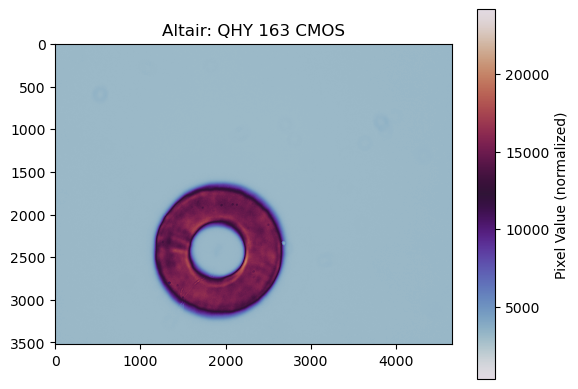

In [57]:
altair = r'C:/Users/jakef/OneDrive/Desktop/ASTR_362/Observing/science_images/Altair_4.fit'

# Open the FITS file
with fits.open(albi) as albi_foo:
    altair_data = altair_foo[0].data / 16 + 1  # Normalize the data
    altair_header = altair_foo[0].header  # Get the header

# Create the Albireo science image by subtracting dark and bias, and dividing by normalized flat
altair_image = (altair_data - (dark_mean - bias_mean)) / normalized_flat

# Plot the Albireo image
plt.imshow(albi_image, cmap='twilight') #lets you change the color scheme 
plt.title('Altair: QHY 163 CMOS')
plt.colorbar(label='Pixel Value (normalized)')
plt.show()